<a href="https://colab.research.google.com/github/Vineeth-vj/Telecom-churn-analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

## First, lets import the data set.

> For this,

*   Import python libraries that needed for analysis
*   import the libraries needed for graphical represenation of analysis





In [1]:
# data analysis libraries
import pandas as pd
import numpy as np
# data visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# mount the drive for accessing the data csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the csv file and making of data frame
file_path='/content/drive/MyDrive/Almabetter/Team capstone project/Telecom churn analysis/Telecom Churn.csv'
df=pd.read_csv(file_path)

## Lets explore the data set

In [4]:
# lets see the number of rows and columns in the data frame
df.shape

(3333, 20)

In [5]:
# so here we have 3333 number rows and 20 columns, now lets check the 20 features
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
# dataframe 1st 5 rows
df.head().T


,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account length,128,107,137,84,75
Area code,415,415,415,408,415
International plan,No,No,No,Yes,Yes
Voice mail plan,Yes,Yes,No,No,No
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total day charge,45.07,27.47,41.38,50.9,28.34
Total eve minutes,197.4,195.5,121.2,61.9,148.3


In [7]:
df.tail().T

,3328,3329,3330,3331,3332
State,AZ,WV,RI,CT,TN
Account length,192,68,28,184,74
Area code,415,415,510,510,415
International plan,No,No,No,Yes,No
Voice mail plan,Yes,No,No,No,Yes
Number vmail messages,36,0,0,0,25
Total day minutes,156.2,231.1,180.8,213.8,234.4
Total day calls,77,57,109,105,113
Total day charge,26.55,39.29,30.74,36.35,39.85
Total eve minutes,215.5,153.4,288.8,159.6,265.9


In [8]:
# We can check the data set for null values, here we can apply info() method
# info() method can describe the entire nature of the data frame like data types of columns (features)
# info() method can show the count of non null records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
# we can cehck the overall descriptive summary by using describe() method
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [10]:
# lets check the unique number of unique values of diffenrt columns
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

NOW LETS FIND OUT SOME RESULTS AND THEIR GRAPHICAL REPRESENTATION

In [23]:
# counting the churn values
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


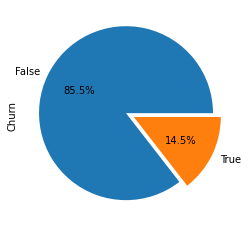

In [32]:
#lets plot a pie diagram for the above condietion
df['Churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%')